### You can run this notebook at Colab by clicking here:

<a target="_blank" href="https://colab.research.google.com/github/NMRLipids/databank-template/blob/main/scripts/plotSimulation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Intialize NMRlipids databank

In [1]:
# This installs NMRlipids Databank on COLAB environment,
# you can use the same commands on your local machine if you run it locally.

import sys

if 'google.colab' in sys.modules:
    !git clone https://github.com/NMRlipids/Databank
    %cd Databank
    !pip3 install .

In [36]:
# These two lines include core Databank routines and Databank API
from DatabankLib.core import *
from DatabankLib.databankLibrary import *
# This is for plotting
from DatabankLib.databankio import *
from DatabankLib.plottings import plotSimulation
from IPython.display import display, Markdown

# This initializes the databank and stores the information of all simulations into a list.
# Each list item contains the information from README.yaml file of the given simulation.
systems = initialize_databank()

Databank initialized from the folder: /home/comcon1/repo/Databank/Data/Simulations


# Print and plot basic properties of a system selected based on ID number 

In [76]:
# Define a function - simulation report generator
def genReport(ID):
    system = systems.loc(ID)

    ## Get resolved DOI to the stored Simulation
    url = resolve_doi_url(system['DOI'])   
    ## Average area per lipid for the selected simulation
    APL = CalcAreaPerMolecule(system)
    ## Membrane thickness for the selected simulation
    thickness = GetThickness(system)
    ## Lipid hydration level
    hydration = getHydrationLevel(system)
    ## Composition
    comp = dict()
    for lipid in system['COMPOSITION']:
        if lipid not in lipids_dict:
            continue
        comp[lipid] = '%.1f' % (calcLipidFraction(system, lipid)*100)
    
    display(Markdown(f'''
## Report for Simulation  #{ID}  

Author(s): _{system['AUTHORS_CONTACT']}_  
Date: _{system['DATEOFRUNNING']}_  
Simulation permanent link: {url}  

- Composition (\%): {':'.join(comp.keys())} ({':'.join(comp.values())})  
- Membrane area per lipid: {APL:.1f} Å$^2$  
- Membrane thickness: {thickness:.1f} nm  
- Hydration level: {hydration:.1f} water/lipid  
- Relative equilibration time for each lipid in the simulation (ns):  
'''
                    ))
    ## Relative PCA equlibration time for the selected simulation
    ShowEquilibrationTimes(system)
        
    ## Plot form factor and C-H bond order parameters from the simulation together with experimental data if avaible
    display(Markdown('''
### Graphical report   
_Plot form factor and C-H bond order parameters from the simulation_  
_together with corresponding experimental data (if avaible)_ \n'''))
    
    for lipid in comp:
        print(lipid)
        plotSimulation(system, lipid)


## Report for Simulation  #761  

Author(s): _Frankel, Patrick_  
Date: _01/09/2023_  
Simulation permanent link: https://doi.org/10.5281/zenodo.8299506  

- Composition (\%): POPC (100.0)  
- Membrane area per lipid: 60.2 Å$^2$  
- Membrane thickness: 4.3 nm  
- Hydration level: 39.1 water/lipid  
- Relative equilibration time for each lipid in the simulation (ns):  


POPC: 25.762383882109376



### Graphical report   
_Plot form factor and C-H bond order parameters from the simulation_  
_together with corresponding experimental data (if avaible)_ 


POPC
DOI:  10.5281/zenodo.8299506
Form factor quality:  1.755000000000001
Force field quality not found


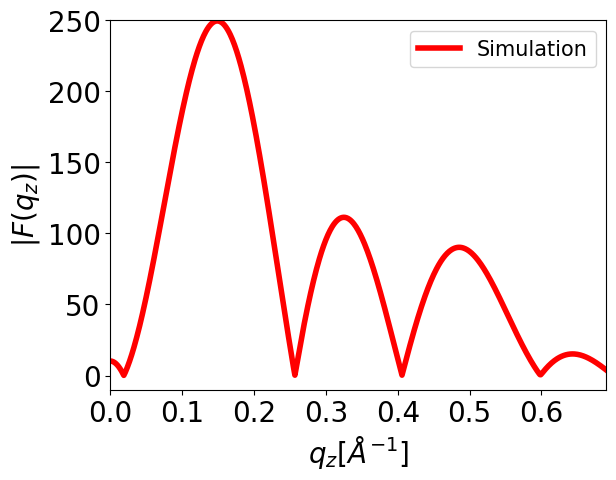

Form factor plotting failed


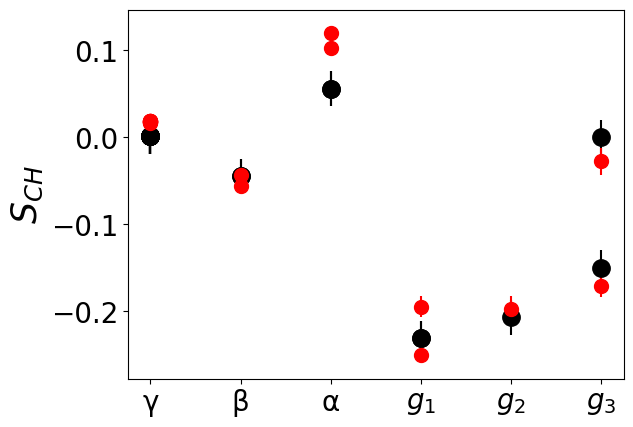

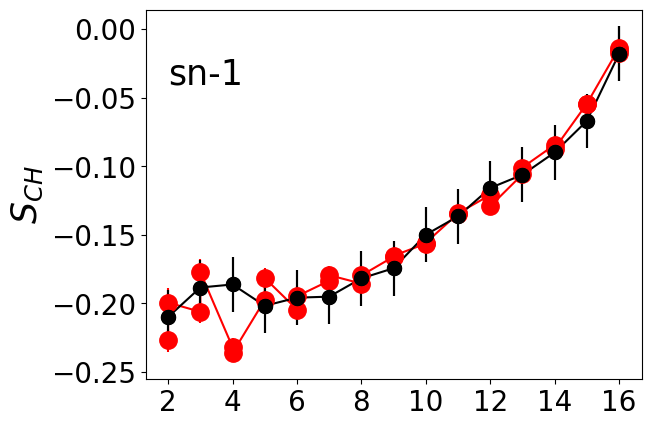

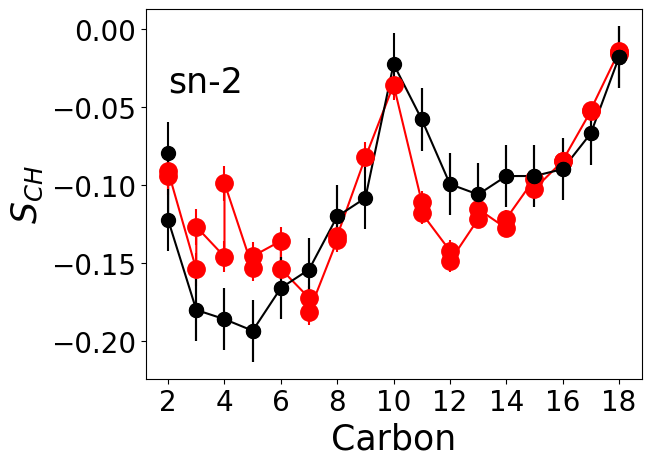

In [77]:
genReport(761)


## Report for Simulation  #380  

Author(s): _Melcr, Josef_  
Date: _20/01/2022_  
Simulation permanent link: https://doi.org/10.5281/zenodo.1488094  

- Composition (\%): POPS:POPC (50.0:50.0)  
- Membrane area per lipid: 62.1 Å$^2$  
- Membrane thickness: 4.2 nm  
- Hydration level: 41.0 water/lipid  
- Relative equilibration time for each lipid in the simulation (ns):  


POPC: 0.2709643022242977
POPS: 0.27320849895178256



### Graphical report   
_Plot form factor and C-H bond order parameters from the simulation_  
_together with corresponding experimental data (if avaible)_ 


POPS
DOI:  10.5281/zenodo.1488094
Force field quality not found


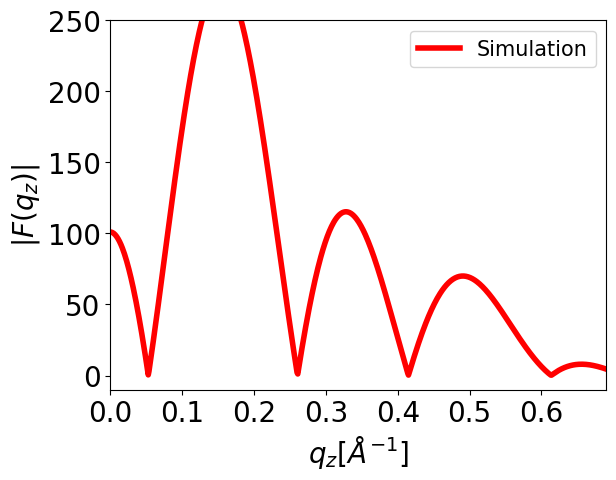

Form factor plotting failed


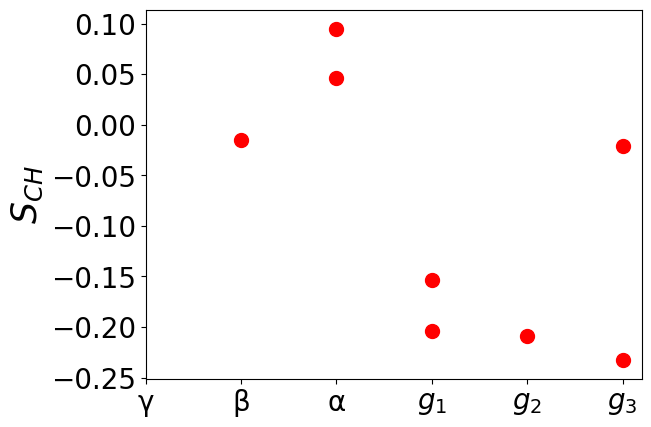

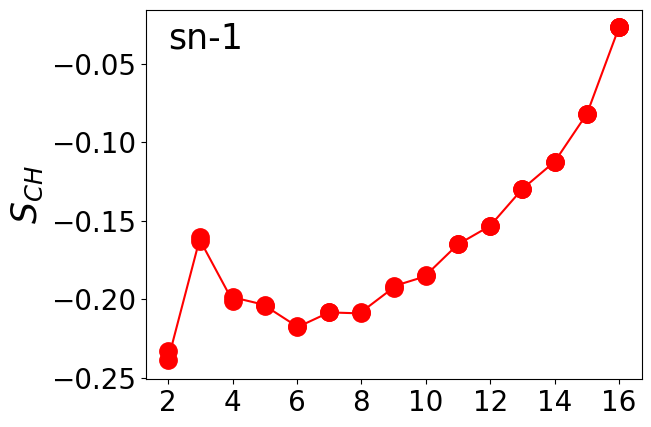

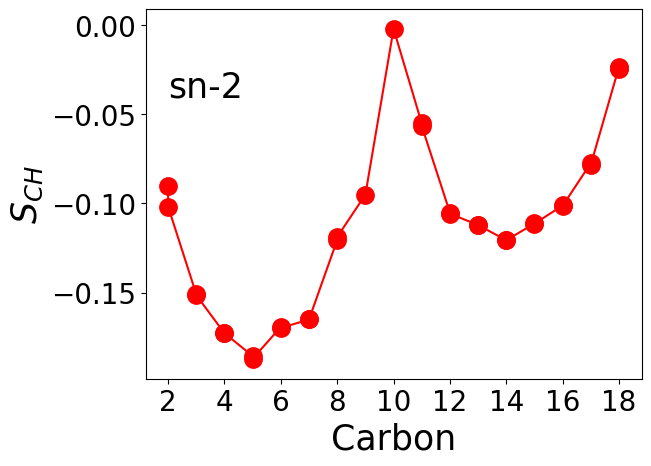

POPC
DOI:  10.5281/zenodo.1488094
Force field quality not found


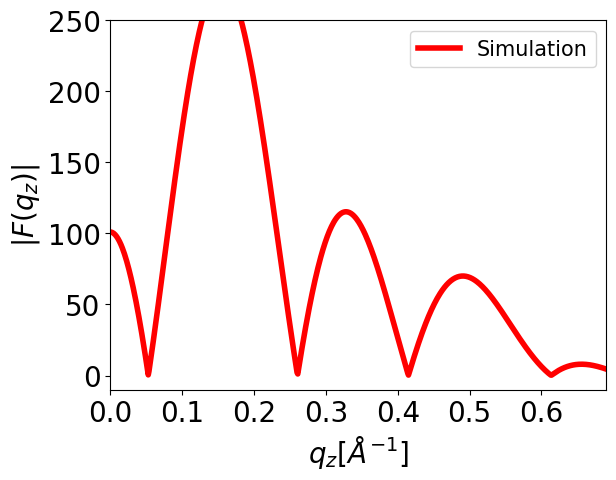

Form factor plotting failed


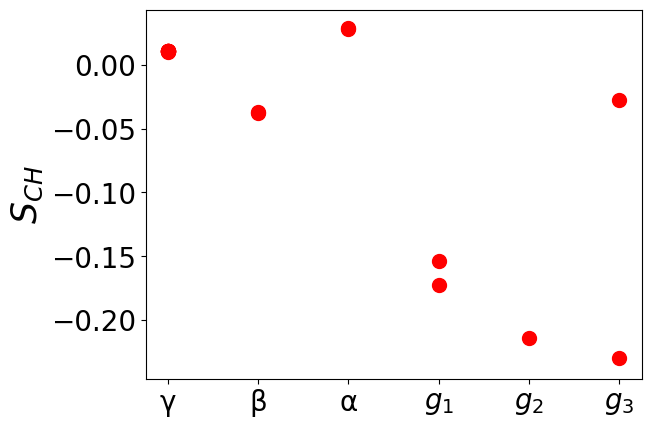

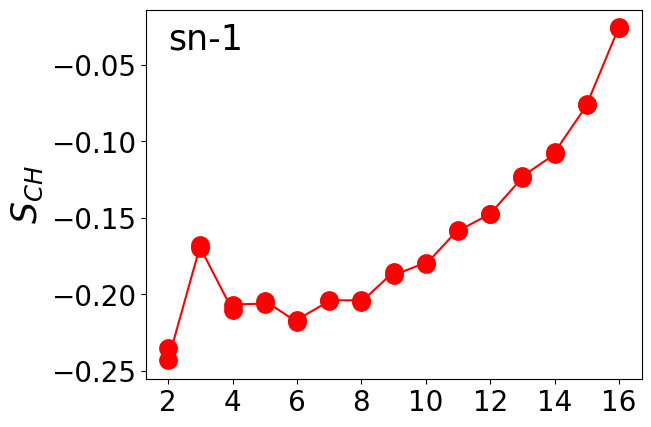

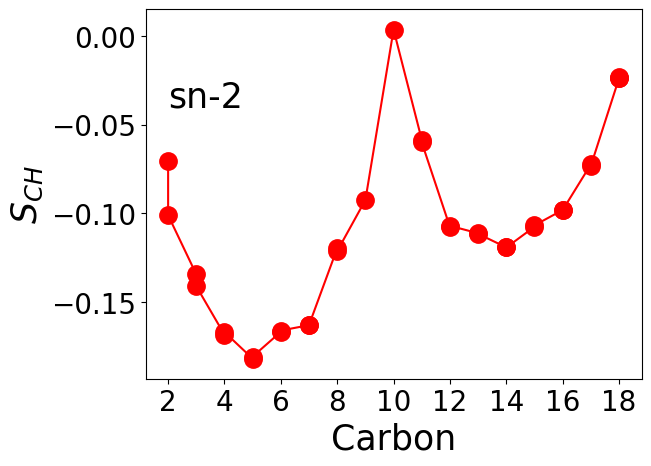

In [78]:
genReport(380)